# **CardioGPT: A Transformer-Based Approach to Convert Tabular EHR into Clinical Narratives for Prompting a Heart Disease Expert GPT Model**

In this study, heart patient data from the UCI dataset has been used, which was in a table format. But Large Language Models (LLMs), like GPT, work best with text — not tables. So, we faced two big challenges: the data was tabular, and the classes (healthy to severe heart disease) were imbalanced.

Traditionally, it’s not reliable to generate synthetic data for class imbalance correction when the features are categorical. Techniques like SMOTE, ADAYSN, and ENN work well for numeric data but struggle with categorical data — especially in medical datasets, where each category has a specific clinical meaning. So, creating synthetic data in text format, with a clear understanding of its medical value, is necessary.

To solve this, we used a table-to-text method by fine-tuning a GPT model that turned the table data into clinical text. Then, we used a clinical text generative model (MedGPT) to create more realistic examples for the underrepresented heart disease classes.

Finally, we used prompting — giving short medical texts from new patients to a trained GPT model — to see if it could predict heart disease severity.

All the GPT models used in this project were implemented using Hugging Face libraries and pre-trained models.

This project demonstrates how LLMs can be creatively applied to transform tabular data into meaningful medical texts and equip a GPT model with specialized knowledge in heart disease, even when working with imbalanced data.

**Initial Dataset:**
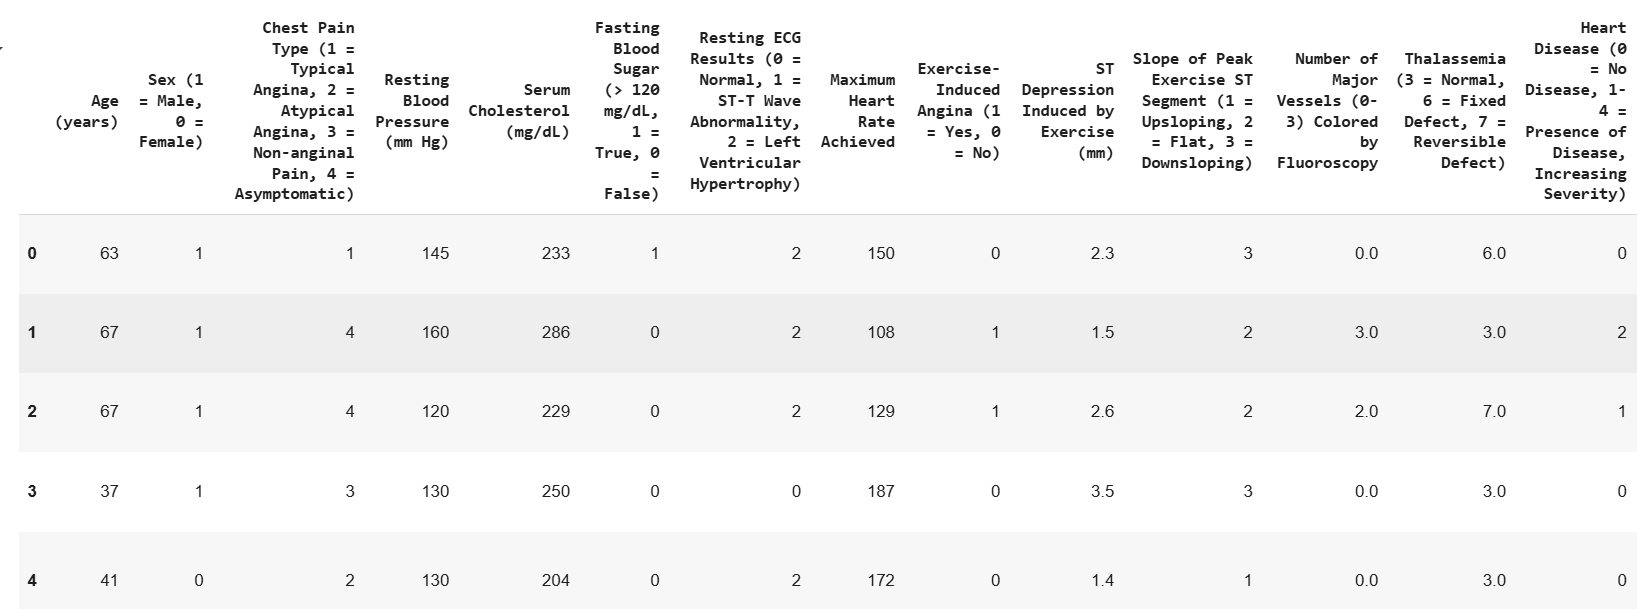

**After conversion to text:**

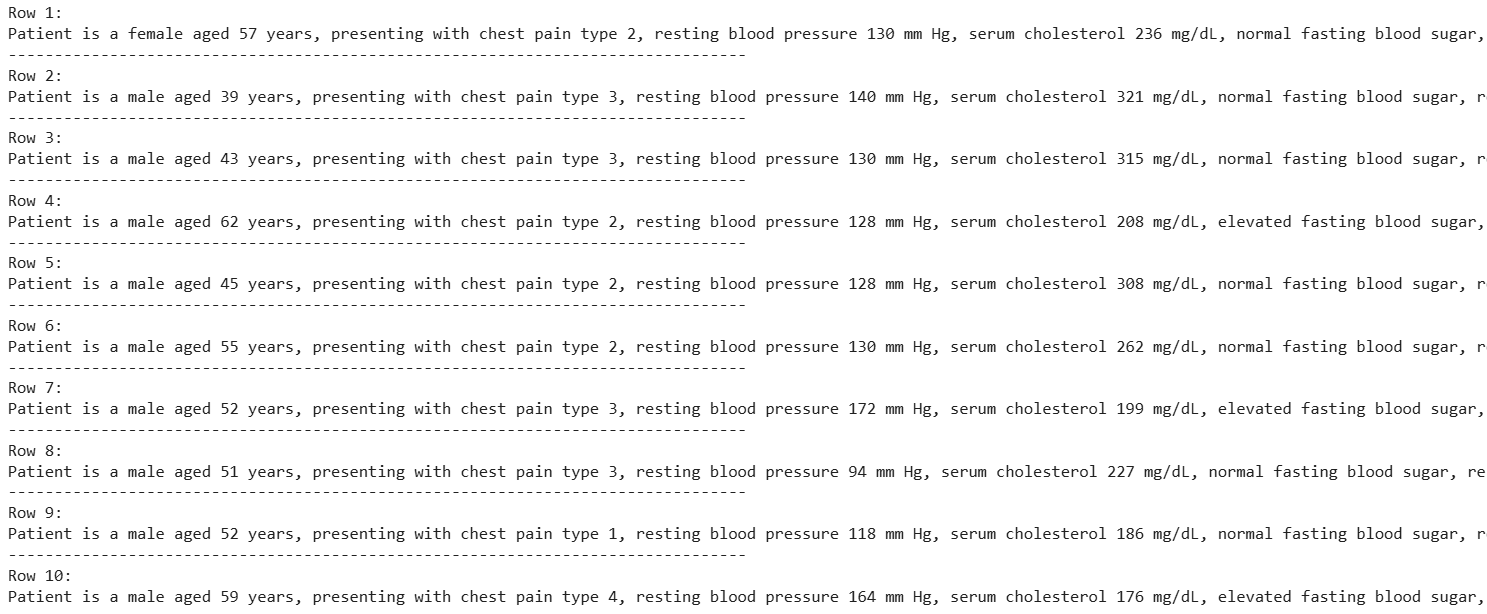

**After training the model:**

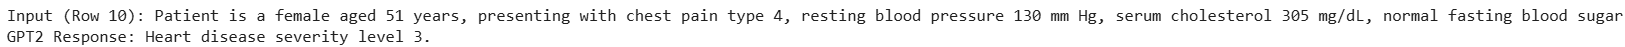

**Keywords:**
1. Large Language Models (LLMs)

2. Table-to-Text Conversion

3. Clinical Text Generation

4. Class Imbalance

5. Prompt-based Prediction

In [ ]:
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating static visualizations
from matplotlib.ticker import MultipleLocator  # For customizing axis ticks in matplotlib plots
import seaborn as sns  # For enhanced statistical data visualization (built on matplotlib)
import plotly.express as px  # For interactive and animated plots

%matplotlib inline  # Ensures matplotlib plots are displayed inline in Jupyter Notebooks

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install the ucimlrepo package to easily access datasets from the UCI Machine Learning Repository
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

In [ ]:
# Merge the features and targets into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the merged DataFrame
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


In [ ]:
# Data size
df.shape

(303, 14)

In [ ]:
# Null value checking
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Cleaning the null values
df = df.dropna()

In [ ]:
# Null value checking
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# Dataset size
df.shape

(297, 14)

In [ ]:
# Count occurrences for each category in each feature
for column in df.columns:
    print(f"Counts for {column}:")
    print(df[column].value_counts())
    print()  # Add a newline for better readability

Counts for age:
age
58    18
57    17
54    16
59    14
60    12
51    12
62    11
44    11
56    11
52    11
41    10
64    10
63     9
67     9
45     8
55     8
61     8
65     8
42     8
46     7
53     7
66     7
43     7
48     7
50     7
49     5
47     5
70     4
39     4
68     4
35     4
40     3
69     3
71     3
37     2
34     2
29     1
77     1
38     1
74     1
76     1
Name: count, dtype: int64

Counts for sex:
sex
1    201
0     96
Name: count, dtype: int64

Counts for cp:
cp
4    142
3     83
2     49
1     23
Name: count, dtype: int64

Counts for trestbps:
trestbps
120    37
130    36
140    32
110    19
150    17
160    11
125    10
128    10
138    10
112     9
118     7
132     7
124     6
135     6
108     6
134     5
145     5
152     5
170     4
100     4
122     4
105     3
115     3
126     3
142     3
180     3
136     3
178     2
144     2
94      2
148     2
146     2
102     2
117     1
172     1
101     1
200     1
104     1
155     1
165     1
174     

In [ ]:
# Dataset size
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# Converting dataset with meaningful names
df.rename(columns={
    "age": "Age (years)",
    "sex": "Sex (1 = Male, 0 = Female)",
    "cp": "Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)",
    "trestbps": "Resting Blood Pressure (mm Hg)",
    "chol": "Serum Cholesterol (mg/dL)",
    "fbs": "Fasting Blood Sugar (> 120 mg/dL, 1 = True, 0 = False)",
    "restecg": "Resting ECG Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy)",
    "thalach": "Maximum Heart Rate Achieved",
    "exang": "Exercise-Induced Angina (1 = Yes, 0 = No)",
    "oldpeak": "ST Depression Induced by Exercise (mm)",
    "slope": "Slope of Peak Exercise ST Segment (1 = Upsloping, 2 = Flat, 3 = Downsloping)",
    "ca": "Number of Major Vessels (0-3) Colored by Fluoroscopy",
    "thal": "Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)",
    "num": "Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)"
}, inplace=True)

In [ ]:
# Dataset visualization with meaningful link
df.head()

,Age (years),"Sex (1 = Male, 0 = Female)","Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)",Resting Blood Pressure (mm Hg),Serum Cholesterol (mg/dL),"Fasting Blood Sugar (> 120 mg/dL, 1 = True, 0 = False)","Resting ECG Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy)",Maximum Heart Rate Achieved,"Exercise-Induced Angina (1 = Yes, 0 = No)",ST Depression Induced by Exercise (mm),"Slope of Peak Exercise ST Segment (1 = Upsloping, 2 = Flat, 3 = Downsloping)",Number of Major Vessels (0-3) Colored by Fluoroscopy,"Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)","Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)"
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [ ]:
# Count occurrences for each category in each feature
for column in df.columns:
    print(f"Counts for {column}:")
    print(df[column].value_counts())
    print()  # Add a newline for better readability

Counts for Age (years):
Age (years)
58    18
57    17
54    16
59    14
60    12
51    12
62    11
44    11
56    11
52    11
41    10
64    10
63     9
67     9
45     8
55     8
61     8
65     8
42     8
46     7
53     7
66     7
43     7
48     7
50     7
49     5
47     5
70     4
39     4
68     4
35     4
40     3
69     3
71     3
37     2
34     2
29     1
77     1
38     1
74     1
76     1
Name: count, dtype: int64

Counts for Sex (1 = Male, 0 = Female):
Sex (1 = Male, 0 = Female)
1    201
0     96
Name: count, dtype: int64

Counts for Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic):
Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)
4    142
3     83
2     49
1     23
Name: count, dtype: int64

Counts for Resting Blood Pressure (mm Hg):
Resting Blood Pressure (mm Hg)
120    37
130    36
140    32
110    19
150    17
160    11
125    10
128    10
138    10
112     9
118     7
13

# EHR (tabular format) to clinical text Conversion

## GPT Model

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from transformers import GPT2Tokenizer, GPT2Model, GPT2PreTrainedModel, Trainer, TrainingArguments
from transformers import GPT2Config
from torch import nn
from torch.utils.data import Dataset

# Separate features and target
input_features = df.drop(columns=["Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)"])
target = df["Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)"]

# Convert each row to a clinical-style sentence
def row_to_text(row):
    return (f"Patient is a {int(row['Sex (1 = Male, 0 = Female)']) and 'male' or 'female'} aged {row['Age (years)']} years, "
            f"presenting with chest pain type {row['Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)']}, "
            f"resting blood pressure {row['Resting Blood Pressure (mm Hg)']} mm Hg, serum cholesterol {row['Serum Cholesterol (mg/dL)']} mg/dL, "
            f"{'elevated' if row['Fasting Blood Sugar (> 120 mg/dL, 1 = True, 0 = False)'] else 'normal'} fasting blood sugar, "
            f"resting ECG showing result {row['Resting ECG Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy)']}, "
            f"maximum heart rate achieved {row['Maximum Heart Rate Achieved']}, "
            f"{'with' if row['Exercise-Induced Angina (1 = Yes, 0 = No)'] else 'without'} exercise-induced angina, "
            f"ST depression of {row['ST Depression Induced by Exercise (mm)']} mm, "
            f"slope of ST segment {row['Slope of Peak Exercise ST Segment (1 = Upsloping, 2 = Flat, 3 = Downsloping)']}, "
            f"{row['Number of Major Vessels (0-3) Colored by Fluoroscopy']} major vessels affected, "
            f"thalassemia type {row['Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)']}.")

# Apply to dataset
df["clinical_text"] = input_features.apply(row_to_text, axis=1)

# Train/Test Split
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["clinical_text"].tolist(), target.tolist(), test_size=0.2, random_state=42
)

# Tokenizer and dataset
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
tokenizer.pad_token = tokenizer.eos_token

class ClinicalTextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=256):
        self.encodings = tokenizer(texts, truncation=True, padding="max_length", max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx])
        }

    def __len__(self):
        return len(self.labels)

train_dataset = ClinicalTextDataset(train_texts, train_labels, tokenizer)
test_dataset = ClinicalTextDataset(test_texts, test_labels, tokenizer)

# Classification model on top of GPT2
class GPT2ForClassification(GPT2PreTrainedModel):
    def __init__(self, config, num_labels=5):
        super().__init__(config)
        self.transformer = GPT2Model(config)
        self.classifier = nn.Sequential(
            nn.Dropout(0.1),
            nn.Linear(config.hidden_size, num_labels)
        )

    def forward(self, input_ids, attention_mask=None, labels=None):
        outputs = self.transformer(input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Use last token
        logits = self.classifier(cls_output)
        loss = None
        if labels is not None:
            loss = nn.CrossEntropyLoss()(logits, labels)
        return {"loss": loss, "logits": logits}

# Initialize model
config = GPT2Config.from_pretrained("gpt2", num_labels=5)
model = GPT2ForClassification.from_pretrained("gpt2", config=config)

# Training arguments (fixed)
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",   # Evaluation happens every epoch
    save_strategy="epoch",         # Save the model every epoch (must match eval strategy)
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    save_total_limit=1,
    load_best_model_at_end=True,
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

Some weights of GPT2ForClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['classifier.1.bias', 'classifier.1.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: sbakter48 (sbakter48-northern-university-bangladesh) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss
1,No log,1.242278
2,No log,1.216179
3,No log,1.185104


TrainOutput(global_step=90, training_loss=1.4604000515407987, metrics={'train_runtime': 149.691, 'train_samples_per_second': 4.75, 'train_steps_per_second': 0.601, 'total_flos': 92893516485120.0, 'train_loss': 1.4604000515407987, 'epoch': 3.0})

In [ ]:
# Make predictions on the test set
predictions_output = trainer.predict(test_dataset)

# Raw logits
logits = predictions_output.predictions

# Convert logits to predicted class labels
predicted_labels = torch.argmax(torch.tensor(logits), axis=1).numpy()

# Actual labels
true_labels = test_labels

In [ ]:
# Drop target column to get input features only
input_features = df.drop(columns=["Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)"])

# Apply the conversion function row-wise
df["clinical_text"] = input_features.apply(row_to_text, axis=1)

# View the converted text
print(df["clinical_text"].head())

0    Patient is a male aged 63 years, presenting wi...
1    Patient is a male aged 67 years, presenting wi...
2    Patient is a male aged 67 years, presenting wi...
3    Patient is a male aged 37 years, presenting wi...
4    Patient is a female aged 41 years, presenting ...
Name: clinical_text, dtype: object


In [ ]:
# Preview with original data + clinical text
df_with_text = df.copy()
df_with_text["clinical_text"] = input_features.apply(row_to_text, axis=1)
df_with_text.head()

,Age (years),"Sex (1 = Male, 0 = Female)","Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)",Resting Blood Pressure (mm Hg),Serum Cholesterol (mg/dL),"Fasting Blood Sugar (> 120 mg/dL, 1 = True, 0 = False)","Resting ECG Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy)",Maximum Heart Rate Achieved,"Exercise-Induced Angina (1 = Yes, 0 = No)",ST Depression Induced by Exercise (mm),"Slope of Peak Exercise ST Segment (1 = Upsloping, 2 = Flat, 3 = Downsloping)",Number of Major Vessels (0-3) Colored by Fluoroscopy,"Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)","Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)",clinical_text
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,"Patient is a male aged 63 years, presenting wi..."
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,"Patient is a male aged 67 years, presenting wi..."
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,"Patient is a male aged 67 years, presenting wi..."
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0,"Patient is a male aged 37 years, presenting wi..."
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0,"Patient is a female aged 41 years, presenting ..."


In [ ]:
# Dataset size
df_with_text.shape

(297, 15)

In [ ]:
"""
# Saving the clinical text dataset

save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/clinical_text_dataset.csv"

# Save to CSV
df_with_text.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/clinical_text_dataset.csv


In [ ]:
# Loading the clinical text dataset

load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/clinical_text_dataset.csv"

# Load the DataFrame
df_loaded = pd.read_csv(load_path)

# Preview
df_loaded.head()

,Age (years),"Sex (1 = Male, 0 = Female)","Chest Pain Type (1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal Pain, 4 = Asymptomatic)",Resting Blood Pressure (mm Hg),Serum Cholesterol (mg/dL),"Fasting Blood Sugar (> 120 mg/dL, 1 = True, 0 = False)","Resting ECG Results (0 = Normal, 1 = ST-T Wave Abnormality, 2 = Left Ventricular Hypertrophy)",Maximum Heart Rate Achieved,"Exercise-Induced Angina (1 = Yes, 0 = No)",ST Depression Induced by Exercise (mm),"Slope of Peak Exercise ST Segment (1 = Upsloping, 2 = Flat, 3 = Downsloping)",Number of Major Vessels (0-3) Colored by Fluoroscopy,"Thalassemia (3 = Normal, 6 = Fixed Defect, 7 = Reversible Defect)","Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)",clinical_text
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,"Patient is a male aged 63 years, presenting wi..."
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,"Patient is a male aged 67 years, presenting wi..."
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,"Patient is a male aged 67 years, presenting wi..."
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0,"Patient is a male aged 37 years, presenting wi..."
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0,"Patient is a female aged 41 years, presenting ..."


In [ ]:
from sklearn.model_selection import train_test_split

# Define the target column name
target_col = "Heart Disease (0 = No Disease, 1-4 = Presence of Disease, Increasing Severity)"

X = df_loaded["clinical_text"]

# y = target column
y = df_loaded[target_col]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Preview
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(237,) (237,)
(60,) (60,)


In [ ]:
# Assuming y_train and y_test are numpy arrays or lists
train_unique, train_counts = np.unique(y_train, return_counts=True)
test_unique, test_counts = np.unique(y_test, return_counts=True)

print("Training set unique categories and counts:")
for category, count in zip(train_unique, train_counts):
    print(f"Category {category}: {count}")

print("\nTest set unique categories and counts:")
for category, count in zip(test_unique, test_counts):
    print(f"Category {category}: {count}")

Training set unique categories and counts:
Category 0: 128
Category 1: 43
Category 2: 28
Category 3: 28
Category 4: 10

Test set unique categories and counts:
Category 0: 32
Category 1: 11
Category 2: 7
Category 3: 7
Category 4: 3


In [ ]:
# Showing a few clinical texts

for idx, text in enumerate(x_train):
    print(f"Row {idx + 1}:\n{text}\n{'-'*80}")

Row 1:
Patient is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy, maximum heart rate achieved 174, without exercise-induced angina, ST depression of 0.0 mm, slope of ST segment 2, 1.0 major vessels affected, thalassemia type 3.0.
--------------------------------------------------------------------------------
Row 2:
Patient is a male aged 39 years, presenting with chest pain type 3, resting blood pressure 140 mm Hg, serum cholesterol 321 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy, maximum heart rate achieved 182, without exercise-induced angina, ST depression of 0.0 mm, slope of ST segment 1, 0.0 major vessels affected, thalassemia type 3.0.
--------------------------------------------------------------------------------
Row 3:
Patient is a male aged 43 years, presenting with chest pain type 3, r

# Generating synthetic text data to balance the train set

## BioGPT

In [ ]:
# Install the Hugging Face Transformers and Datasets libraries silently (suppress output)
!pip install transformers datasets --quiet

# Install sacremoses, a tokenizer dependency used by some Hugging Face models
!pip install sacremoses

# Import PyTorch for tensor operations and deep learning
import torch

# Import GPT-2 model and tokenizer from Hugging Face Transformers
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Import pandas for data manipulation and analysis
import pandas as pd

# Import numpy for numerical operations
import numpy as np

# Import tqdm to display progress bars during loops or data processing
from tqdm import tqdm

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# BioGPT
model_name = "microsoft/BioGPT"

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)
model.eval()

# Enable GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

BioGptForCausalLM(
  (biogpt): BioGptModel(
    (embed_tokens): BioGptScaledWordEmbedding(42384, 1024, padding_idx=1)
    (embed_positions): BioGptLearnedPositionalEmbedding(1026, 1024)
    (layers): ModuleList(
      (0-23): 24 x BioGptDecoderLayer(
        (self_attn): BioGptSdpaAttention(
          (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
          (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
        )
        (activation_fn): GELUActivation()
        (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (fc1): Linear(in_features=1024, out_features=4096, bias=True)
        (fc2): Linear(in_features=4096, out_features=1024, bias=True)
        (final_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
      )
    )
    (layer_norm): LayerNorm((

In [ ]:
# Convert to DataFrame for easier handling
train_df = pd.DataFrame({'text': x_train, 'label': y_train})

# Find how many samples to generate per minority class
target_count = 128
class_counts = train_df['label'].value_counts().to_dict()

samples_to_generate = {
    cls: target_count - count
    for cls, count in class_counts.items()
    if cls != 0 and count < target_count
}

print("Samples to generate per class:", samples_to_generate)

Samples to generate per class: {1: 85, 3: 100, 2: 100, 4: 118}


In [ ]:
def generate_synthetic_samples(prompt, n_samples, max_length=250):
    # Initialize an empty list to store generated text samples
    synthetic_texts = []

    # Encode the input prompt and move to the same device as the model (e.g., CPU or GPU)
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Loop to generate 'n_samples' number of synthetic texts
    for _ in tqdm(range(n_samples), desc=f"Generating samples for: {prompt.strip()}"):
        # Generate output text from the model using sampling with top-k and top-p (nucleus sampling)
        output = model.generate(
            input_ids,
            max_length=max_length,          # Maximum length of the generated text
            num_return_sequences=1,         # Generate one sequence per iteration
            do_sample=True,                 # Enable sampling instead of greedy decoding
            top_k=50,                       # Keep only top 50 tokens with highest probability
            top_p=0.95,                     # Nucleus sampling: consider top tokens with cumulative prob of 95%
            temperature=0.9,                # Controls randomness: lower is more deterministic
            pad_token_id=tokenizer.eos_token_id  # Pad with EOS token to avoid warnings
        )

        # Decode the generated token IDs to text
        decoded = tokenizer.decode(output[0], skip_special_tokens=True)

        # Remove the original prompt from the output and take only the first line
        synthetic = decoded.replace(prompt, "").strip().split('\n')[0]

        # Append the full synthetic sentence with the original prompt prefix
        synthetic_texts.append(prompt + synthetic)

    # Return the list of generated synthetic text samples
    return synthetic_texts

In [ ]:
# Initialize an empty list to store the synthetic data samples
synthetic_data = []

# Loop through each class label and the number of synthetic samples needed for it
for label, n_needed in samples_to_generate.items():

    # Select an example text from the training data for the current label
    prompt_example = train_df[train_df['label'] == label]['text'].values[0]

    # Build a prompt using a truncated portion of the patient description
    # Assumes 'Patient' is a keyword used in the text to start the profile
    prompt = "Patient profile: " + prompt_example.split("Patient")[1][:200] + "..."

    # Generate synthetic clinical texts using the previously defined function
    generated_texts = generate_synthetic_samples(prompt, n_samples=n_needed)

    # Append each generated text with its corresponding label to the synthetic_data list
    for text in generated_texts:
        synthetic_data.append({'text': text, 'label': label})

Generating samples for: Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...: 100%|██████████| 85/85 [00:08<00:00,  9.91it/s]
Generating samples for: Patient profile:  is a male aged 59 years, presenting with chest pain type 4, resting blood pressure 164 mm Hg, serum cholesterol 176 mg/dL, elevated fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...: 100%|██████████| 100/100 [00:12<00:00,  8.19it/s]
Generating samples for: Patient profile:  is a male aged 66 years, presenting with chest pain type 4, resting blood pressure 112 mm Hg, serum cholesterol 212 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy...: 100%|██████████| 100/100 [00:21<00:00,  4.63it/s]
Generating samples for: Patient profile:  is a male aged 70 years, presenting with chest pain type 4, resting bloo

In [ ]:
# Create DataFrame of synthetic samples
synthetic_df = pd.DataFrame(synthetic_data)

# Combine with original training data
balanced_train_df = pd.concat([train_df, synthetic_df]).reset_index(drop=True)

# Shuffle the combined dataset
balanced_train_df = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Final X and y
x_train_balanced = balanced_train_df['text'].tolist()
y_train_balanced = balanced_train_df['label'].tolist()

# Check class distribution
print("\nBalanced class distribution:")
print(balanced_train_df['label'].value_counts())



Balanced class distribution:
label
4    128
1    128
0    128
2    128
3    128
Name: count, dtype: int64


In [ ]:
"""
# Create DataFrame of synthetic samples
synthetic_df = pd.DataFrame(synthetic_data)

save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/synthetic_df.csv"

# Save to CSV
synthetic_df.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""


File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/synthetic_df.csv


In [ ]:
# Loading the synthetic dataset
load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/synthetic_df.csv"

# Load the DataFrame
synthetic_df = pd.read_csv(load_path)

# Preview
synthetic_df.head()

,text,label
0,"Patient profile: is a female aged 57 years, p...",1
1,"Patient profile: is a female aged 57 years, p...",1
2,"Patient profile: is a female aged 57 years, p...",1
3,"Patient profile: is a female aged 57 years, p...",1
4,"Patient profile: is a female aged 57 years, p...",1


In [ ]:
# x = inputs
x_train_balanced = synthetic_df["text"]

# y = target column
y_train_balanced = synthetic_df["label"]

In [ ]:
# Loop through each text sample in the balanced training dataset and print it with its index
for idx, text in enumerate(x_train_balanced):
    # Print the row number (1-based index) and the text content
    print(f"Row {idx + 1}:\n{text}\n{'-'*80}")  # Separator line for readability

Row 1:
Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
--------------------------------------------------------------------------------
Row 2:
Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
---------------------

In [ ]:
# Specify the row number to inspect (human-friendly index, starting from 1)
row_num = 85  # Example: to view the 85th row

# Print the content of the specified row from the balanced training dataset
# Subtract 1 to convert to 0-based indexing (Python lists are zero-indexed)
print(f"Row {row_num}:\n{x_train_balanced[row_num - 1]}\n{'-'*80}")  # Print a separator line for clarity

Row 85:
Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
--------------------------------------------------------------------------------


In [ ]:
# Ensure pandas shows full text in columns
pd.set_option('display.max_colwidth', None)

# Filter and print full text rows for label = 1
for label_val in [1]:
    print(f"\n=== Label {label_val} ===\n")
    subset = synthetic_df[synthetic_df['label'] == label_val]
    for idx, row in subset.iterrows():
        print(f"Row {idx + 1}:\n{row['text']}\n{'-'*80}")


=== Label 1 ===

Row 1:
Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
--------------------------------------------------------------------------------
Row 2:
Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
---

In [ ]:
# 'text' is the column name for the generated text
# and 'label' is the column name for the class labels (1, 2, 3, 4)

for label_val in [1]:
    print(f"\n=== Label {label_val} ===\n")
    subset = synthetic_df[synthetic_df['label'] == label_val]
    for idx, row in subset.iterrows():
        print(f"Row {idx + 1}:\n{row['text']}\n{'-'*80}")


=== Label 1 ===

Row 1:
Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
--------------------------------------------------------------------------------
Row 2:
Patient profile:  is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a female aged 57 years, presenting with chest pain type 2, resting blood pressure 130 mm Hg, serum cholesterol 236 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
---

In [ ]:
# 'text' is the column name for the generated text
# and 'label' is the column name for the class labels (1, 2, 3, 4)

for label_val in [2]:
    print(f"\n=== Label {label_val} ===\n")
    subset = synthetic_df[synthetic_df['label'] == label_val]
    for idx, row in subset.iterrows():
        print(f"Row {idx + 1}:\n{row['text']}\n{'-'*80}")


=== Label 2 ===

Row 186:
Patient profile:  is a male aged 66 years, presenting with chest pain type 4, resting blood pressure 112 mm Hg, serum cholesterol 212 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy...Patient profile: is a male aged 66 years, presenting with chest pain type 4, resting blood pressure 112 mm Hg, serum cholesterol 212 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy...
--------------------------------------------------------------------------------
Row 187:
Patient profile:  is a male aged 66 years, presenting with chest pain type 4, resting blood pressure 112 mm Hg, serum cholesterol 212 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy...Patient profile: is a male aged 66 years, presenting with chest pain type 4, resting blood pressure 112 mm Hg, serum cholesterol 212 mg / dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy...

In [ ]:
# 'text' is the column name for the generated text
# and 'label' is the column name for the class labels (1, 2, 3, 4)

for label_val in [3]:
    print(f"\n=== Label {label_val} ===\n")
    subset = synthetic_df[synthetic_df['label'] == label_val]
    for idx, row in subset.iterrows():
        print(f"Row {idx + 1}:\n{row['text']}\n{'-'*80}")


=== Label 3 ===

Row 86:
Patient profile:  is a male aged 59 years, presenting with chest pain type 4, resting blood pressure 164 mm Hg, serum cholesterol 176 mg/dL, elevated fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a male aged 59 years, presenting with chest pain type 4, resting blood pressure 164 mm Hg, serum cholesterol 176 mg / dL, elevated fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
--------------------------------------------------------------------------------
Row 87:
Patient profile:  is a male aged 59 years, presenting with chest pain type 4, resting blood pressure 164 mm Hg, serum cholesterol 176 mg/dL, elevated fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...Patient profile: is a male aged 59 years, presenting with chest pain type 4, resting blood pressure 164 mm Hg, serum cholesterol 176 mg / dL, elevated fasting blood sugar, resting ECG showing Left Ventricular Hypertrop...
-

In [ ]:
# 'text' is the column name for the generated text
# and 'label' is the column name for the class labels (1, 2, 3, 4)

for label_val in [4]:
    print(f"\n=== Label {label_val} ===\n")
    subset = synthetic_df[synthetic_df['label'] == label_val]
    for idx, row in subset.iterrows():
        print(f"Row {idx + 1}:\n{row['text']}\n{'-'*80}")


=== Label 4 ===

Row 286:
Patient profile:  is a male aged 70 years, presenting with chest pain type 4, resting blood pressure 145 mm Hg, serum cholesterol 174 mg/dL, normal fasting blood sugar, resting ECG showing Normal, maximum heart rate a...Patient profile: is a male aged 70 years, presenting with chest pain type 4, resting blood pressure 145 mm Hg, serum cholesterol 174 mg / dL, normal fasting blood sugar, resting ECG showing Normal, maximum heart rate a...
--------------------------------------------------------------------------------
Row 287:
Patient profile:  is a male aged 70 years, presenting with chest pain type 4, resting blood pressure 145 mm Hg, serum cholesterol 174 mg/dL, normal fasting blood sugar, resting ECG showing Normal, maximum heart rate a...Patient profile: is a male aged 70 years, presenting with chest pain type 4, resting blood pressure 145 mm Hg, serum cholesterol 174 mg / dL, normal fasting blood sugar, resting ECG showing Normal, maximum heart rate a...

# Using GPT to fine-tuned on these clinical texts and predict heart disease severity

In [ ]:
# Merging clinical texts and synthetic texts
import pandas as pd

x_train = pd.concat([x_train, x_train_balanced], axis=0)
y_train = pd.concat([y_train, y_train_balanced], axis=0)

In [ ]:
# Dataset (train:input) size
x_train.shape

(640,)

In [ ]:
# Dataset (train:target) size
y_train.shape

(640,)

In [ ]:
# Dataset (test:input) size
x_test.shape

(60,)

In [ ]:
# Dataset (test:target) size
y_test.shape

(60,)

In [ ]:
# Assuming y_train and y_test are numpy arrays or lists
train_unique, train_counts = np.unique(y_train, return_counts=True)
test_unique, test_counts = np.unique(y_test, return_counts=True)

print("Training set unique categories and counts:")
for category, count in zip(train_unique, train_counts):
    print(f"Category {category}: {count}")

print("\nTest set unique categories and counts:")
for category, count in zip(test_unique, test_counts):
    print(f"Category {category}: {count}")

Training set unique categories and counts:
Category 0: 128
Category 1: 128
Category 2: 128
Category 3: 128
Category 4: 128

Test set unique categories and counts:
Category 0: 32
Category 1: 11
Category 2: 7
Category 3: 7
Category 4: 3


In [ ]:
# Load the DataFrame
x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/x_train.csv")
y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/y_train.csv")
x_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/x_test.csv")
y_test = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/Dataset/y_test.csv")

In [ ]:
# Install the Hugging Face Transformers and Datasets libraries for working with pre-trained models and standard datasets
!pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
# Install essential libraries for NLP and machine learning:
# - transformers: for using pre-trained models like BERT, GPT, etc.
# - datasets: to access and manage standard NLP datasets
# - accelerate: for efficient model training on CPU/GPU/TPU
# - scikit-learn: for classical ML algorithms, evaluation metrics, and preprocessing
!pip install transformers datasets accelerate scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# Function to convert numerical label into a descriptive text response
def label_to_text(label):
    return "No heart disease detected." if label == 0 else f"Heart disease severity level {label}."

# Extract training inputs and labels from DataFrame columns
train_inputs = x_train.iloc[:, 0].tolist()   # List of clinical texts
train_labels = y_train.iloc[:, 0].tolist()   # Corresponding labels

# Construct instruction-style prompts paired with their corresponding responses
# This format is useful for fine-tuning instruction-following language models (like T5, GPT, etc.)
train_texts = [
    f"Instruction: Predict heart disease severity based on clinical text.\n"
    f"Clinical Text: {text}\nResponse: {label_to_text(label)}"
    for text, label in zip(train_inputs, train_labels)
]

# Convert the list of formatted texts into a Hugging Face Dataset object
from datasets import Dataset
train_dataset = Dataset.from_dict({"text": train_texts})

In [ ]:
from transformers import GPT2Tokenizer

# Load the pre-trained GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Set the padding token to the end-of-sequence token (GPT-2 has no default pad token)
tokenizer.pad_token = tokenizer.eos_token

# Define a tokenization function for preparing the dataset
def tokenize(example):
    # Tokenize the text with truncation and padding to a fixed length
    tokenized = tokenizer(
        example["text"],
        truncation=True,
        padding="max_length",  # Pad to the max_length specified below
        max_length=512         # Maximum sequence length for GPT-2
    )
    # Set the labels for language modeling to be the same as input_ids
    # (typical for causal language modeling where the model predicts the next token)
    tokenized["labels"] = tokenized["input_ids"].copy()
    return tokenized

# Apply the tokenization function to the entire training dataset
tokenized_train = train_dataset.map(tokenize)

Map:   0%|          | 0/640 [00:00<?, ? examples/s]

In [ ]:
from transformers import GPT2LMHeadModel, Trainer, TrainingArguments

# Load the pre-trained GPT-2 model with a language modeling head (for text generation tasks)
model = GPT2LMHeadModel.from_pretrained("gpt2")

# Define training hyperparameters and configurations
training_args = TrainingArguments(
    output_dir="./gpt2-hd-finetuned",     # Directory to save the model and checkpoints
    per_device_train_batch_size=2,        # Small batch size (adjust based on available memory)
    num_train_epochs=4,                   # Number of full passes through the training data
    logging_steps=10,                     # Log training progress every 10 steps
    save_steps=500,                       # Save a checkpoint every 500 steps
    save_total_limit=1,                   # Keep only the most recent checkpoint to save space
    evaluation_strategy="no",             # No evaluation during training (can enable if needed)
    report_to="none",                     # Disable reporting to tools like WandB or TensorBoard
    fp16=True                             # Enable mixed-precision training (faster on supported GPUs)
)

# Set up the Trainer for supervised fine-tuning
trainer = Trainer(
    model=model,                      # The model to train
    args=training_args,               # Training configuration
    train_dataset=tokenized_train,    # Tokenized training dataset
    tokenizer=tokenizer               # Tokenizer used (important for saving/loading)
)

# Start the training process
trainer.train()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-20-e1eebb616a98>:17: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
10,7.850600
20,0.888500
30,0.309900
40,0.152400
50,0.087500
60,0.084500
70,0.072100
80,0.073900
90,0.049500
100,0.068900


TrainOutput(global_step=1280, training_loss=0.11082456322619691, metrics={'train_runtime': 239.0116, 'train_samples_per_second': 10.711, 'train_steps_per_second': 5.355, 'total_flos': 668907601920000.0, 'train_loss': 0.11082456322619691, 'epoch': 4.0})

In [ ]:
"""
# Define your custom save path
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/model"

# Save the model
model.save_pretrained(save_path)

# Save the tokenizer
tokenizer.save_pretrained(save_path)
"""

('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/model/tokenizer_config.json',
 '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/model/special_tokens_map.json',
 '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/model/vocab.json',
 '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/model/merges.txt',
 '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/Table2Text/model/added_tokens.json')

In [ ]:
# Format a clinical text input into an instruction-based prompt suitable for the fine-tuned GPT-2 model
def format_prompt(clinical_text):
    return f"Instruction: Predict heart disease severity based on clinical text.\nClinical Text: {clinical_text}\nResponse:"

# Generate predictions using the fine-tuned GPT-2 model
def predict_gpt(model, tokenizer, clinical_texts, max_new_tokens=32):
    model.eval()  # Set model to evaluation mode
    predictions = []

    # Iterate through each clinical text and generate a prediction
    for text in clinical_texts:
        prompt = format_prompt(text)  # Format text into instruction prompt

        # Tokenize and move input to the same device as the model (e.g., CPU/GPU)
        input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)

        # Generate text continuation from the model
        output = model.generate(
            input_ids,
            max_new_tokens=max_new_tokens,  # Limit how much new text the model generates
            temperature=0.7,                # Sampling temperature (controls randomness)
            top_p=0.95,                     # Nucleus sampling
            repetition_penalty=1.1,         # Penalize repetition to avoid looping
            pad_token_id=tokenizer.eos_token_id  # Ensure proper padding
        )

        # Decode and extract only the response part of the generated text
        decoded = tokenizer.decode(output[0], skip_special_tokens=True)
        prediction = decoded.split("Response:")[-1].strip()  # Extract response portion
        predictions.append(prediction)

    return predictions

# Generate predictions on the test set
test_prompts = x_test.iloc[:, 0].tolist()
predictions = predict_gpt(model, tokenizer, test_prompts)

# Display the first 5 test inputs and their corresponding model responses
for i in range(5):
    print(f"Input: {test_prompts[i]}")
    print(f"GPT2 Response: {predictions[i]}")
    print("-" * 80)

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Input: Patient is a female aged 54 years, presenting with chest pain type 3, resting blood pressure 108 mm Hg, serum cholesterol 267 mg/dL, normal fasting blood sugar, resting ECG showing Left Ventricular Hypertrophy, maximum heart rate achieved 167, without exercise-induced angina, ST depression of 0.0 mm, slope of ST segment 1, 0.0 major vessels affected, thalassemia type 3.0.
GPT2 Response: No heart disease detected.
--------------------------------------------------------------------------------
Input: Patient is a female aged 60 years, presenting with chest pain type 3, resting blood pressure 120 mm Hg, serum cholesterol 178 mg/dL, elevated fasting blood sugar, resting ECG showing Normal, maximum heart rate achieved 96, without exercise-induced angina, ST depression of 0.0 mm, slope of ST segment 1, 0.0 major vessels affected, thalassemia type 3.0.
GPT2 Response: No heart disease detected.
--------------------------------------------------------------------------------
Input: Pati

In [ ]:
# Choose a specific row
row_num = 10
clinical_input = x_test.iloc[row_num, 0]

# Run prediction
single_prediction = predict_gpt(model, tokenizer, [clinical_input])[0]

# Show result
print(f"Input (Row {row_num}): {clinical_input}")
print(f"GPT2 Response: {single_prediction}")

Input (Row 10): Patient is a female aged 51 years, presenting with chest pain type 4, resting blood pressure 130 mm Hg, serum cholesterol 305 mg/dL, normal fasting blood sugar, resting ECG showing Normal, maximum heart rate achieved 142, with exercise-induced angina, ST depression of 1.2 mm, slope of ST segment 2, 0.0 major vessels affected, thalassemia type 7.0.
GPT2 Response: Heart disease severity level 3.
